# Анализ сервиса аренды самокатов GoFast

**Цель исследования:**

1. Тратят ли пользователи с подпиской больше времени на поездки?
2. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

**Ход исследования:**

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

*Описание данных*

Пользователи — `users_go.csv`

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

Поeздки — `rides_go.csv`

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

Подписки — `subscriptions_go.csv`

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

Исследование пройдёт в 7 этапов:

1. Загрузка данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Объединение данных.
5. Подсчёт выручки.
6. Проверка гипотез.
7. Общие выводы.

### 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

#### Загрузка данных по пользователям

In [2]:
# чтение файла с данными и сохранение в data_users
try:
    data_users = pd.read_csv('/datasets/users_go.csv', sep=',')
except: 
    data_users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep=',')

In [3]:
# получение первых 10 строк таблицы data_users
data_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


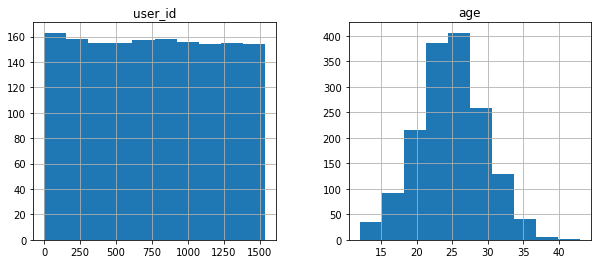

In [4]:
# гистораммы датасета
data_users.hist(figsize=(10, 4))
plt.show()

In [5]:
# получение общей информации о данных в таблице data_users
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Описание данных— `users_go.csv`, dtypes: int64(2), object(3)

- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

#### Загрузка данных по поездкам

In [6]:
# чтение файла с данными и сохранение в data_rides
try:
    data_rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
except: 
    data_rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep=',')

In [7]:
# получение первых 10 строк таблицы data_rides
data_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


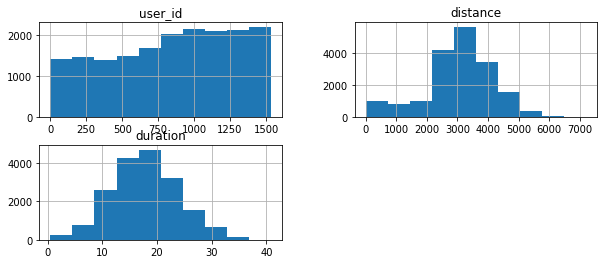

In [8]:
# гистораммы датасета
data_rides.hist(figsize=(10, 4))
plt.show()

In [9]:
# получение общей информации о данных в таблице data_rides
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Описание данных — `rides_go.csv`, dtypes: float64(2), int64(1), object(1)

- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

#### Загрузка данных по подпискам

In [10]:
# чтение файла с данными и сохранение в data_subs
try:
    data_subs = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')
except: 
    data_subs = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep=',')

In [11]:
# получение первых 10 строк таблицы data_subs
data_subs.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


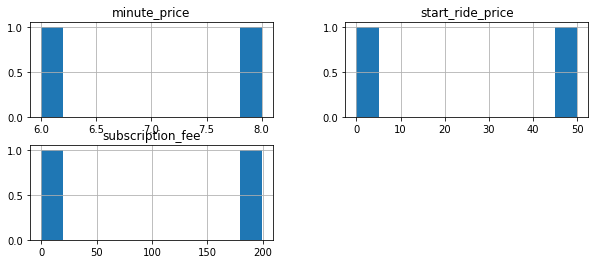

In [12]:
# гистораммы датасета
data_subs.hist(figsize=(10, 4))
plt.show()

In [13]:
# получение общей информации о данных в таблице data_subs
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Описание данных — `subscriptions_go.csv`

- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

**Вывод**

Загрузили и изучили общую информацию о каждом датафрейме.

Перейдём к предобработке данных.

### 2. Предобработка данных

#### Пропуски значений

In [14]:
# подсчёт пропусков
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
# подсчёт пропусков
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [16]:
# подсчёт пропусков
data_subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

#### Изменение типов данных

In [17]:
# преобразуем date к типу datetime с помощью pd.to_datetime
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y.%m.%d')

data_rides.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [18]:
# проверим год в столбце date
data_rides['date'].dt.year.unique()

array([2021])

In [19]:
# создадим новый столбец с номером месяца на основе столбца date
data_rides['month'] = data_rides['date'].dt.month

data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


#### Дубликаты

In [20]:
# найдём явные дубликаты
data_users.duplicated().sum()

31

In [21]:
# удалим небольшое число явных дубликатов
data_users.drop_duplicates(inplace=True)

data_users.duplicated().sum()

0

In [22]:
# найдём явные дубликаты
data_rides.duplicated().sum()

0

In [23]:
# найдём явные дубликаты
data_subs.duplicated().sum()

0

**Вывод**

- пропусков не обнаружено;
- обнаружено и удалено небольшое число дубликатов в `data_users`;
- добавили столбец month с номер месяца. 

Перейдём к исследовательскому анализу.

### 3. Исследовательский анализ данных

#### Частота встречаемости городов

In [24]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

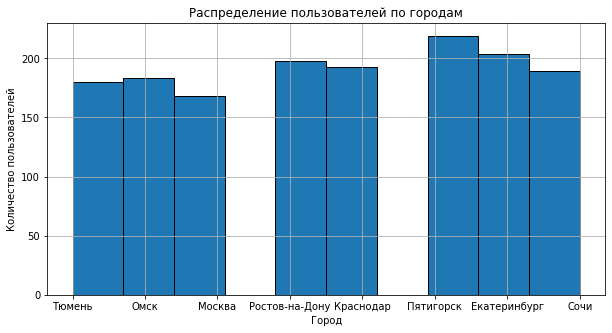

In [25]:
data_users['city'].hist(figsize=(10,5), ec='black')
plt.title('Распределение пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
plt.show()

**Описание:** наибольшее пользователей в Пятигорске - 219, а наименьшее в Москве - 168.

#### Cоотношение пользователей с подпиской и без подписки

In [26]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

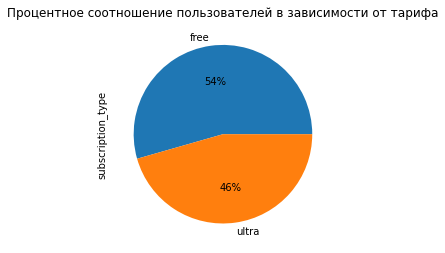

In [27]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.0f%%', 
    figsize=(4,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

**Описание:** пользователи без подписки составлют 54%, а с подпиской - 46%, что на 8% меньше по сравнению с бесплатными пользователями.

#### Возраст пользователей

In [28]:
print('Наименьший возраст пользователя:', data_users['age'].min())
print('Наибольший возраст пользователя:',data_users['age'].max())

Наименьший возраст пользователя: 12
Наибольший возраст пользователя: 43


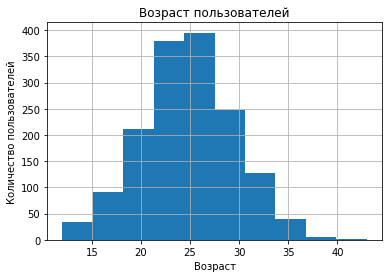

In [29]:
plt.hist(data_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

**Описание:** наименьший возраст пользователя - 12, а наибольший - 43. Основная категория пользователей с 18 до 30 года. 

#### Расстояние, которое пользователь преодолел за одну поездку

In [30]:
print('Наименьшее расстояние пользователя за одну поездку:', data_rides['distance'].min())
print('Наибольшее  расстояние пользователя за одну поездку:', data_rides['distance'].max())

Наименьшее расстояние пользователя за одну поездку: 0.855682925681208
Наибольшее  расстояние пользователя за одну поездку: 7211.007744598519


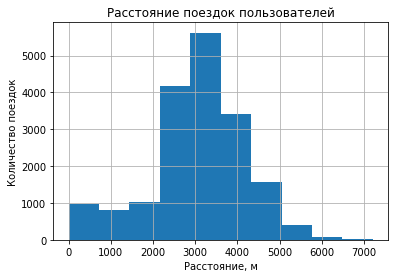

In [31]:
plt.hist(data_rides['distance'], bins = 10)
plt.title('Расстояние поездок пользователей')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

**Описание:** наименьшее расстояние пользователя за одну поездку - 0.86 м, а наибольшее - 7211 м. Основная категория пользователей совершает поездку от 2 до 5 км. 

#### Продолжительность поездок

In [32]:
print('Наименьшая продолжительность поездки пользователя:', data_rides['duration'].min())
print('Наибольшая продолжительность поездки пользователя:', data_rides['duration'].max())

Наименьшая продолжительность поездки пользователя: 0.5
Наибольшая продолжительность поездки пользователя: 40.82396261922424


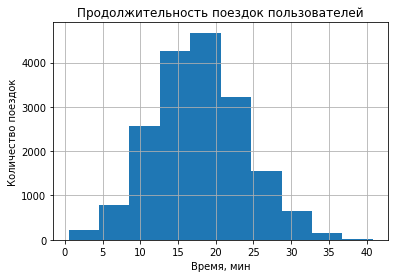

In [33]:
plt.hist(data_rides['duration'], bins = 10)
plt.title('Продолжительность поездок пользователей')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.grid()
plt.show()

**Описание:** наименьшая продолжительность поездки пользователя - 30 сек, а наибольшая - 40 минут. Основная категория пользователей совершает поездку от 8 до 28 минут.

**Вывод**

1. **Частота встречаемости городов:** наибольшая частота поездок в Пятигорске - 219, а наименьшая в Москве - 168. Предполагаем, что в Пятигорске удобнее брать самокат, чтобы куда-то добраться по сравненвнию с Москвой.



2. **Соотношение пользователей с подпиской и без подписки:** пользователи без подписки составлют 54%, а с подпиской - 46%, что на 8% меньше по сравнению с бесплатными пользователями.


3. **Возраст пользователей:** наименьший возраст пользователя - 12, а наибольший - 43. Основная категория пользователей с 18 до 30 лет.


4. **Расстояние, которое пользователь преодолел за одну поездку:** наименьшее расстояние пользователя за одну поездку - 0.86 м, а наибольшее - 7211 м. Основная категория пользователей совершает поездку от 2 до 5 км.


5. **Продолжительность поездок:** наименьшая продолжительность поездки пользователя - 30 сек, а наибольшая - 40 минут. Основная категория пользователей совершает поездку от 8 до 28 минут. Предполагаем, что пользователи просто передумали пользоваться самокатом или прозошла ошибка при старте.

Переходим к следующему шагу - объединение данных.

### 4. Объединение данных

#### Объединение данных о пользователях, поездках и подписках в один датафрейм. 

In [34]:
data_users.shape

(1534, 5)

In [35]:
data_rides.shape

(18068, 5)

In [36]:
data_subs.shape

(2, 4)

In [37]:
data = data_users.merge(data_rides)

In [38]:
data = data.merge(data_subs)

In [39]:
data.shape

(18068, 12)

In [40]:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


####  Создаём ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [41]:
subs_free = data.query("subscription_type == 'free'")
subs_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [42]:
subs_ultra = data.query("subscription_type == 'ultra'")
subs_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


#### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

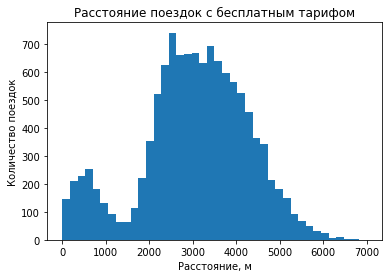

<Figure size 1440x1440 with 0 Axes>

In [43]:
plt.hist(subs_free['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние поездок с бесплатным тарифом')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

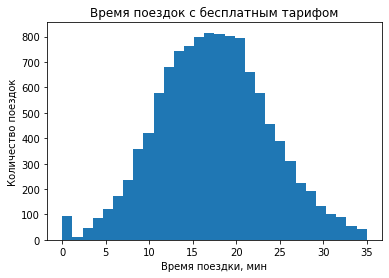

<Figure size 1440x1440 with 0 Axes>

In [44]:
plt.hist(subs_free['duration'], bins=30, range = (0, 35))
plt.title('Время поездок с бесплатным тарифом')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

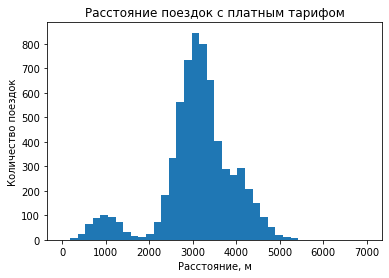

<Figure size 1440x1440 with 0 Axes>

In [45]:
plt.hist(subs_ultra['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние поездок с платным тарифом')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

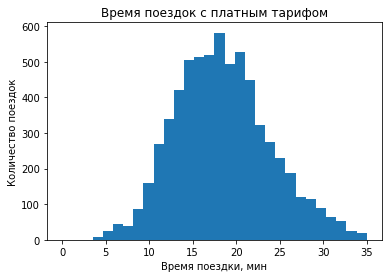

<Figure size 1440x1440 with 0 Axes>

In [46]:
plt.hist(subs_ultra['duration'], bins=30, range = (0, 35))
plt.title('Время поездок с платным тарифом')
plt.xlabel('Время поездки, мин')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

**Вывод:** объединили данные о пользователях, поездках и тарифах в один датафрейм - `data`.

На его основе создали два датафрейма:
- `subs_free` - информация о пользователях с бесплатным тарифом
- `subs_ultra` - Информация о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

**Бесплатный тариф:** время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6 км и более.

**Платный тариф:** время поездки составляет от 15 до 25 минут. Пик расстояния приходится на 3 км.

Итого: на основе данных делаем вывод, что пользователи с бесплатным тарифом совершают более долгие поездки и проезжают большее расстояние, чем пользователи на платном тарифе.

Переходим к подсчёту выручки.

### 5. Подсчёт выручки

#### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма из шага 4: 
- найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [47]:
revenue = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len, 
                                      'subscription_type' : min})

In [48]:
revenue.rename(columns = {'name' : 'rides'}, inplace = True)

In [49]:
revenue.isna().sum()

distance             0
duration             0
rides                0
subscription_type    0
dtype: int64

In [50]:
revenue.head()

distance   duration  rides subscription_type
month user_id                                                 
1     1        7027.511294  41.416640      2             ultra
      3        3061.777147  12.654443      1             ultra
      5        3914.646990  12.395153      1             ultra
      7        6478.080979  27.653450      2             ultra
      12       3577.151148  32.462907      1             ultra

#### В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.

In [51]:
revenue['duration'] = np.ceil(revenue['duration'])

In [52]:
revenue

distance  duration  rides subscription_type
month user_id                                                
1     1        7027.511294      42.0      2             ultra
      3        3061.777147      13.0      1             ultra
      5        3914.646990      13.0      1             ultra
      7        6478.080979      28.0      2             ultra
      12       3577.151148      33.0      1             ultra
...                    ...       ...    ...               ...
12    1525     4597.854350      34.0      1              free
      1526     3644.121544      23.0      1              free
      1528     3998.569324      11.0      1              free
      1532     6111.889853      41.0      2              free
      1534     2371.711192      16.0      1              free

[11331 rows x 4 columns]

In [53]:
def month_sum(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['rides']
    else:
        return 'error'

In [54]:
revenue['month_revenue'] = revenue.apply(month_sum, axis=1)

In [55]:
revenue

distance  duration  rides subscription_type  month_revenue
month user_id                                                               
1     1        7027.511294      42.0      2             ultra          451.0
      3        3061.777147      13.0      1             ultra          277.0
      5        3914.646990      13.0      1             ultra          277.0
      7        6478.080979      28.0      2             ultra          367.0
      12       3577.151148      33.0      1             ultra          397.0
...                    ...       ...    ...               ...            ...
12    1525     4597.854350      34.0      1              free          322.0
      1526     3644.121544      23.0      1              free          234.0
      1528     3998.569324      11.0      1              free          138.0
      1532     6111.889853      41.0      2              free          428.0
      1534     2371.711192      16.0      1              free          178.0

[11331 rows x 5 columns]

**Вывод**

Создали новую таблицу `revenue` с агрегированными данными: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а также добавили столбец с помесячной выручкой.

Переходим к проверке гипотез.

### 6. Проверка гипотез

#### Проверим тратят ли пользователи с подпиской больше времени на поездки? 

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи c с бесплатной подпиской?

H_0: время пользователей с подпиской ultra = время пользователей без подписки free

H_1: время пользователей с подпиской ultra > время пользователей без подписки free

alpha = 0.05

In [56]:
ultra = subs_ultra['duration'] 

free = subs_free['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


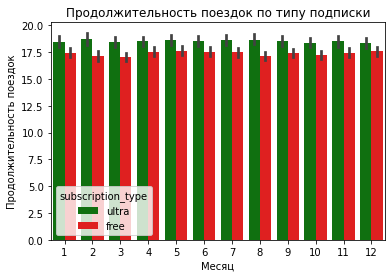

In [57]:
ax = sns.barplot(x = 'month',
            y = 'duration',
            hue = "subscription_type",
            data = data,
            palette = ['green', 'red'])
ax.set_title('Продолжительность поездок по типу подписки')
ax.set(xlabel='Месяц', ylabel='Продолжительность поездок');

**Вывод**

Гипотеза подтверждена, пользователи с тарифом ultra тратят больше времени на поездки, чем пользователи без подписки.

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проверим гипотезу: пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку?

H_0: расстояние пользователей с подпиской ultra = 3130 метров

H_1: расстояние пользователей с подпиской ultra < 3130 метров

alpha = 0.05

In [58]:
ultra_dist = subs_ultra['distance']

interested_value = 3130.0
alpha = .05

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


**Вывод**

Не можем утверждать, что расстояние, которое проехали пользователи с подпиской не превышает 3130 метров.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Проверим гипотезу: помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки?

H_0: выручка пользователей с подпиской ultra = выручка пользователей без подписки

H_1: выручка пользователей с подпиской ultra > выручка пользователей без подписки

alpha = 0.05

In [59]:
ultra_revenue_per_month = revenue.loc[revenue.subscription_type == 'ultra', 'month_revenue']

free_revenue_per_month = revenue.loc[revenue.subscription_type == 'free', 'month_revenue'] 


results = st.ttest_ind(ultra_revenue_per_month, 
                       free_revenue_per_month,
                       alternative = 'greater')

alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.8130926188487286e-35
Отвергаем нулевую гипотезу


**Вывод**

Гипотеза подтверждена, выручка по пользователям с подпиской ultra превышает выручку по пользователям без подписки.

### 7. Общий вывод

**Было проверено три гипотезы и установлено:**

**1.** Гипотеза подтверждена, пользователи с тарифом ultra тратят больше времени на поездки, чем пользователи без подписки.


**2.** Не можем утверждать, что расстояние, которое проехали пользователи с подпиской не превышает 3130 метров.


**3.** Гипотеза подтверждена, выручка по пользователям с подпиской ultra превышает выручку по пользователям без подписки.


**На основе анализа данных вывели:**

- наибольшее количество пользователей находится в Пятигорске - 219, а наименьшее всего в Москве - 168;


- пользователи без подписки составлют 54%, а с подпиской - 46%, что на 8% меньше по сравнению с бесплатными пользователями;


- возраст типичного пользователя составляет от 18 до 30 лет;


- основная категория пользователей проезжают от 2 км до 5 км;


- чаще всего длительность поездки состовляет от 8 до 28 минут.

**Рекомендации:** предлагаем сфокусироваться на продвижении подписки ultra для увеличения выручки внутри сервиса. Первостепенно рекомендуем обратить внимание на города с самыми активными пользователями, топ-3: Пятигорск, Екатеринбург, Ростов-на-Дону.

